In [181]:
import sys
import os
import copy
from glob import glob
from collections import OrderedDict

import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
from astropy.time import Time
import astropy.units as u
from astropy import stats
from astropy.io.ascii import latex

# Setting and imports to enable the display of plots and images in the notebook itself
%matplotlib inline
import IPython

In [2]:
os.environ['XUVTOP'] = '/melkor/d1/guenther/downdata/CHIANTI/'

import chianti.core as ch

 using cli
 using CLI for selections


In [3]:
datadir = '/melkor/d1/guenther/downdata/Chandra/RWaur/'
figout = '/melkor/d1/guenther/Dropbox/my_articles/RWAur/'

In [4]:
obsids = [14539, 17644, 17764, 19980]

% using aastex version 6.1
\documentclass[twocolumn]{aastex61}

%% 
%% where the arguement options are:
%%
%%  twocolumn   : two text columns, 10 point font, single spaced article.
%%                This is the most compact and represent the final published
%%                derived PDF copy of the accepted manuscript from the publisher
%%  manuscript  : one text column, 12 point font, double spaced article.
%%  preprint    : one text column, 12 point font, single spaced article.  
%%  preprint2   : two text columns, 12 point font, single spaced article.
%%  modern      : a stylish, single text column, 12 point font, article with
%% 		  wider left and right margins. This uses the Daniel
%% 		  Foreman-Mackey and David Hogg design.
%%
%% Note that you can submit to the AAS Journals in any of these 6 styles.
%%
%% There are other optional arguments one can envoke to allow other stylistic
%% actions. The available options are:
%%
%%  astrosymb    : Loads Astrosymb font and define \astrocommands. 
%%  tighten      : Makes baselineskip slightly smaller, only works with 
%%                 the twocolumn substyle.
%%  times        : uses times font instead of the default
%%  linenumbers  : turn on lineno package.
%%  trackchanges : required to see the revision mark up and print its output
%%  longauthor   : Do not use the more compressed footnote style (default) for 
%%                 the author/collaboration/affiliations. Instead print all
%%                 affiliation information after each name. Creates a much
%%                 long author list but may be desirable for short author papers

%% Reintroduced the \received and \accepted commands from AASTeX v5.2
\received{...}
\revised{...}
\accepted{\today}
%% Command to document which AAS Journal the manuscript was submitted to.
%% Adds "Submitted to " the arguement.
%\submitjournal{ApJ}


\begin{abstract}
Abstract goes here
\end{abstract}

%% Keywords should appear after the \end{abstract} command. 
%% See the online documentation for the full list of available subject
%% keywords and the rules for their use.
\keywords{editorials, notices --- 
miscellaneous --- catalogs --- surveys}


## Introduction


The formation of stars and planetary systems from large-scale molecular clouds is a complicated process with many interacting components. After the inital collapse of the cloud, an accretion disk forms around the central proto-star. Accretion proceeds from the cloud onto the disk and mass moves slowly inward through the disk. In the inner disk region, gas is ionized by the stellar radiation and gas couples to the stellar magnetic field lines. In the simplest picture, it follows a dipole geometry as it is accelerated falling int othe star and hits the photosphere where a strong shock forms. Low mass stars ($<3m_{\odot}$) at this stage are called classicalt T Tauri stars (CTTS).

The circumstellar disks are the sites of planet formation, the regulate the angular momentum of the star, and they may lauch a disk wind. Typical disks contain a mass of $10^{-3}$ to $10^{-1}\,M_\odot$
and disperse within a few Myrs \citep[see review by][]{Alexander_2013}, which also sets the 
time-scale for planet formation. During their evolution disks undergo large structural changes. In particular, grains grow to larger sizes and larger grains to settle in the disk mid-plane leaving
a gas rich disk atmosphere behind \citep[see review by][]{Williams_2011}.

Gas comprises the majority of the mass in a protoplanetary disk and thus 
controls essential transport processes within the disk like
angular momentum redistribution and dust grain motion.
For example, gas affects grain growth through the coupling of
gas and dust dynamics \citep{Weidenschilling_1977, Takeuchi_2001}
as well as the thermal and chemical balance of the disk 
\citep[e.g.][]{Woitke_2009}. 

Planitesimals in the disk accrete gas and dust in the planet formation process and might clear gaps in the disk **ref**, and even in a relatively undisturbed disk, there will be horizontal stratifiction where the grains settle in the mid-plane, but gas reaches a larger scale height. Images of T~Tauri star disks often have asymmetries or gaps **disk**. Thus, the distribution of grain sizes in the stellar environment differs significantly for different sight lines.

At the inner disk edge, the material is heated up and dust evaporates. Close to the star, the disk must thus be dust-free. X-rays and the UV emission from the star ionize the upper layers of the disk and in particular the inner disk edge. These ions couple to the magnetic field. On the disk surface, ions can be acelerated magneto-centrifugally into a disk wind, possibly dredging along dust particles fro mthe disk. These outflows can be clumpy, presumably changing in response to the magnetic field or the stellar irradiation **Ellerbrok?**. The winds remove angular momentum and allow accretion to proceed. From the inner disk edge, gas is funneled onto the star. **Shu94** predict that this region can also be the source of an outflow, the so-called X-wind. 

All these processes are time variable, in fact, this variability was the original defining characteristic of CTTS, long they were known to be young stars **joy46**. Recent long space-based monitoring campaigns with \emph{COROT}, \emph{K2}, and \emph{Spitzer} revealed many different types of variability in the lightcurves on time scales as short as hours. Of particular interest are stars with periodic or quasi periodic dips in their lightcurve **Cody, Stuaffer**, the best know star of this type is \object{AA Tau}. AA~Tau shows a recurring dip in the lightcurve with a periodicity every eight days; this dip is caused by increased reddening in the visual \citep{1999A&A...349..619B} and goes along with an increase in absorbing column density in X-rays \citep{2007A&A...462L..41S}; the ratio of visual extinction $A_V$ and absorbing column density $n_H$ indicates gas-poor material (but seem more detailed discussion below). AA~Tau is seen very close to edge-on and the best explanation is that an asymmetric feature, such as a warp caused by a planet embedded in the disk, moves through our line-of-sight periodically. In addition, AA~Tau has shown a multi-year long dimming event where the visual extinction incrased by 4 magnitudes \citep{2013A&A...557A..77B} along with an increased X-ray absorbing column density \citep{2015A&A...584A..51S}. The duration of the event and the change in emission lines originating form the upper layers of the disk indicate a position in the disk at a few AU. This absorver has an ISM-like $A_V/N_H$ ratio.

### The $A_V/N_H$ ratio
The canonical 
gas-to-dust ratio of 100:1 found in the interstellar medium is often
also assumed for protoplanetary disks and circumstellar material. 
In contrast, in star forming regions the extinction is local and the extinction
law might differ from the properties in the interstellar medium (ISM). 
In particular, the properties of dust grains, which cause the optical extinction,
are expected to change as the star forming regions evolves and further
evolution takes place after they have been accreted onto a disk. 
We can probe extinction by comparing the X-ray
absorption $N_H$ with the optical extinction $A_V$. X-ray absorption is caused
by the total column density (gas and dust) of heavy ions and is expressed as
the equivalent hydrogen column density, assuming some standard set of
abundances. X-ray absorption is only marginally 
dependent on the form of the absorber as long as its size it not 
too large ($\sim0.1\,\mu$m).
On the other hand, the optical extinction is dominated by the dust
column density and vitally  depends on the dust grain size
distribution.

\citet{2003A&A...408..581V} compared $N_H$ and $A_V$ for six nearby star
forming regions, including the ONC. For the $\rho$~Oph star forming region they
find an $N_H/A_V$ significantly below the ISM value and they interpret this as
a sign that the cloud material in $\rho$~Oph has a lower metal abundance than
the ISM, consistent with recent solar abundance measurements.
Alternatively, grain growth can increase the amount of extinction per unit mass
until the grains reach 1 $\mu$m in size \citep{2011A&A...532A..43O}.

Low $N_H/A_V$ values are seen in several low-mass star forming regions, e.g.\ NGC
1333, and IRAC 20050+2720. Confusingly, studies of high-mass star forming regions
tend to find ISM-like $N_H/A_V$ ratios \citep[see][for more discussion and references]{2012AJ....144..101G}. 
\citet{2008A&A...481..735G} analyzed older,
but still accreting classical T Tauri stars (CTTS) in low-mass star forming regions and found consistently
high $N_H/A_V$ ratios, indicating gas-rich material - some
of these sources could be seen through the accretion column, which would be
dust-depleted due to the stellar irradiation. 
We are left with a complex picture where the dust content, grain growth, and
abundance in the circumstellar matter and the ISM all influence the observed
$N_H/A_V$ ratio and their respective weight in to a specific
target cannot be disentangled. 


\citet{2007ApJ...669..493W} proposed possible reasons for the low $N_H/A_K$
values, among them that the value of $A_K$ has been overestimated due to changes
in the form of the reddening law (however, the required change would be much
greater than has so far been observed). Alternatively, 
grain growth and coagulation can lead to an increase in the extinction per Hydrogen atom in the near IR-bands without strongly affecting the shape of the reddening curve \citep{1980ApJ...235...63J,2001ApJ...548..296W,2007ApJ...666L..73C}. report a decrease in the ratio of the depth of the 9.7~$\mu$m silicate feature to the color excess $E(J-K)$ in molecular clouds relative to that in the diffuse ISM. They note that models predict grain growth can increase the amount of extinction per Hydrogen atom in the near-IR without
strongly affecting the shape of the reddening curve \citep{1994A&A...291..943O}.

While both $N_H$ and $A_K$ are measures of the material along the line of sight, $N_H$ is essentially a measure of number of atoms while extinction is affected by particle shape and the grain size distribution. In the case of a star, which is surrounded by a disk and has a gas accretion column, there are various
layers which can have different particle shapes and grain size distributions.

If we view $N_H/A_K$ as a gas-to-dust ratio, IRAS 20050+2720, Serpens and NGC 1333 are dust rich (or gas poor), compared with the interstellar extinction. In contrast, the sample from \citet{FUSElineforms} shows most sources to be dust depleted (or gas enriched) with much lower absolute values for the extinction. These sources are mostly from the Taurus-Auriga molecular cloud complex, which does not have the high density cluster cores seen in IRAS 20050+2720, Serpens and NGC~1333, and contributes little to the line-of-sight extinction. Thus, their extinction should be dominated by circumstellar material, which could be dust-depleted due to the energy input from the star, gravitational settling of grains in the disk-midplane and planet formation. In contrast, in the younger star forming regions, we mostly see the cloud material, which could be dust-rich for those clouds without high-mass stars or metal poor in the gas phase due to grain formation. 
% 
% 

% 
Alternatively, the apparent change in $N_H/A_K$ could be caused by a change in the dust grain size distribution. In this scenario the dust grows in the moderate density environments of low-mass star forming regions. 
The $A_K$ is derived from the color excess in two bands, e.g. $E(J-K)$ using the ratio of the total to selective extinction $R_K = \frac{A_K}{E(J-K)}$. Larger grains scatter more light, thus extinction per unit mass could be increased in star forming regions, so that the same color excess would be interpreted as a different $A_K$ and thus we would derive a different $N_H/A_K$ ratio. 
The interpretation of the larger $N_H/A_K$  ratio in older stars in Taurus-Auriga \citet{FUSElineforms} is some of the grains have grown to sizes in the mm range, too large to cause substantial reddening.  On the other hand, RCW~108 and RCW~38 are massive and dense star forming regions, their members could supply sufficient UV flux to destroy dust or inhibit grain growth in large parts of the cloud \citep{1999MNRAS.303..367S}, leading to an extinction law closer to the interstellar one.


In the younger star forming regions, we mostly see the cloud material. Although we cannot rule out that these clouds could be dust-rich (perhaps from a high abundance of carbon) or poor
in X-ray absorbing metals, there is no independent evidence for these explanations. Alternatively,

In this scenario, the low $N_H/A_K$ ratio is due to grain growth in the cold, dense molecular cloud material surrounding low-mass star forming regions; although there is some dispersion in the amount of grain growth since IRAS~20050+2720 shows a higher $N_H/A_K$ than NGC~1333 or Serpens. In contrast, the extinctions and gas column densities for class~II objects in the Taurus-Auriga region may have a significant component from the circumstellar disk; grains in these disks may have grown to sizes in the mm range, too large to cause substantial reddening, thus the \citet{FUSElineforms} measurements show a larger $N_H/A_K$ ratio. Alternatively, scattered light from the grains may also contribute to the colors of the objects causing an underestimate of the extinction. The RCW~108 and RCW~38 are massive star forming regions, whose members could supply sufficient radiant flux and/or mechanical power to evaporate grain mantles and break up coagulated dust in large parts of the cloud \citep{1999MNRAS.303..367S}, leading to an extinction law closer to the interstellar one.

### Our target RW Aur



The first observation was published by \citet{2014ApJ...788..101S} when RW~Aur~A was in a bright state. \citet{2015A&A...584L...9S} obtained the follwoing dataset, after RW~Aur became fainter in 2012. 

In [5]:
from astropy import table

def read_lcs(obsid, source):
    lcall = Table.read(os.path.join(datadir, '{0}_{1}_lc.fits').format(obsid, source), hdu=1)
    lcsoft = Table.read(os.path.join(datadir, '{0}_{1}_lc_soft.fits').format(obsid, source), hdu=1)
    lchard = Table.read(os.path.join(datadir, '{0}_{1}_lc_hard.fits').format(obsid, source), hdu=1)
    lc = table.hstack([lcall, lcsoft, lchard], table_names=['all', 'soft', 'hard'], metadata_conflicts='silent')
    # time columns are the same for each lightcurve, so remove dublicate entries here for simplicity
    for c in lc.colnames:
        if (('TIME' in c) or ('AREA' in c) or ('EXPOSURE' in c)) and ('all' in c):
            lc.rename_column(c, c[:-4])
            lc.remove_columns([c[:-4] + '_soft', c[:-4] + '_hard'])
    ind  = lc['EXPOSURE'] > 0.
    return lc[ind]
    
lccurves = [[ read_lcs(obsid, t) for t in ['srca', 'srcb']] for obsid in obsids]
for list1 in lccurves:
    for lc in list1:
        lc['t'] = lc['TIME'] - lc['TIME'][0]

## Observations and data reduction

\label{sect:obs}

### \emph{Chandra} X-ray data

RW~Aur has been observed with \emph{Chandra} four times. Details of the observations are listed in table~\ref{tab:obslog}. Observations are roughly taken two years apart, where the last observation is split into two orbits. All processing is done with CIAO version 4.9 and CALDB 4.7.1. RW~Aur~B is bright enough to cause pile-up in about 10\% of the photons in the new observations; previous data was taken in a 1/8 sub-array mode that reduces the field-of-view and the frame time to alliviate this problem. However, for RW~Aur~A, the focus of this paper, pile-up is not significant in any of the observations. While a few weak sources are detected, only RW~Aur~B provides enough counts in all observations to accurately fit the position. We have thus shifted the coordinate systems of all observations to align RW~Aur with the known optical position. 

We limit our analysis to the band 0.3-9.0~keV. We define source and background regions as in \citet{2015A&A...584L...9S}; see their figure~1 for details. Briefly, a circular source region with radius 0.54~arcsec (covering 75\% of the point-spread function) was placed in the peak of the X-ray emission for RW~Aur A and B. We measured the background flux from a large, source-free region on the same detector and found it to be nigligible. However, the wings of the point-spread-function from the bright RW~Aur~B overlap with the source region of RW~Aur~A. Thus, we define an annulus centered on RW~Aur~B with and inner and outer radius 1 and 2~arcsec, respectively, which corresponds to the radii covered by the extraction region of RW~Aur~A. We remove a segment of $\pm120^\circ$ around the position of RW~Aur~A from this annulus and use the remaining area to extract a background lightcurve and spectrum. Table~\ref{tab:obslog} shows the number of counts detected in the RW~Aur~A source region and the expected number of counts due to contamination by RW~Aur~B in column ``bkg''. This is a small fraction except for ObsID~17644.
We verified that none of our conclusions depend sensitively on the extact placement of the extraction regions.

In [180]:
latex.latexdicts

{'AA': {'data_end': '\\hline',
  'header_end': '\\hline',
  'header_start': '\\hline \\hline',
  'tabletype': 'table'},
 'doublelines': {'data_end': '\\hline\\hline',
  'header_end': '\\hline\\hline',
  'header_start': '\\hline \\hline',
  'tabletype': 'table'},
 'template': {'caption': 'caption',
  'col_align': 'col_align',
  'data_end': 'data_end',
  'data_start': 'data_start',
  'header_end': 'header_end',
  'header_start': 'header_start',
  'preamble': 'preamble',
  'tablealign': 'tablealign',
  'tablefoot': 'tablefoot',
  'tabletype': 'tabletype',
  'units': {'col1': 'unit of col1', 'col2': 'unit of col2'}}}

In [183]:
# output->LaTeX
areafrac = lccurves[0][0]['AREA'][0]/lccurves[0][0]['BG_AREA'][0]

obstab = Table([obsids], names=['ObsID'])
obstab['ObsID'].format = '\\dataset[ADS/Sa.CXO\\#obs/{0}]{{{0}}}'
obstab['ObsID'].format = '\\dataset[{0}]{{ADS/Sa.CXO\\#obs/{0}}}'
obstab['Date'] = [lc[0].meta['DATE-OBS'][:10] for lc in lccurves]
obstab['MJD'] = [lc[0].meta['MJD_OBS'] for lc in lccurves]
obstab['MJD'].format = '{:7.1f}'
obstab['Exp. time'] = [lc[0].meta['TSTOP'] - lc[0].meta['TSTART'] for lc in lccurves]
obstab['Exp. time'].unit = 'ks'
obstab['Exp. time'] /= 1e3
obstab['Exp. time'].format = '{:4.1f}'
obstab['Mode'] = ['1/8 subarray'] *2 + ['full frame'] * 2

acounts = []
abkg = []
for o in obsids:
    acounts.append(len(Table.read(os.path.join(datadir, '{}_srca.fits'.format(o)), hdu=1)))
    abkg.append(len(Table.read(os.path.join(datadir, '{}_bkga.fits'.format(o)), hdu=1)))

obstab['RW Aur A'] = acounts
obstab['RW Aur A'].unit = 'counts'
obstab['bkg'] = np.array(abkg, dtype=float) * areafrac
obstab['bkg'].unit = 'counts'
obstab['bkg'].format = '%4.1f'

latexdict = copy.deepcopy(latex.latexdicts['AA'])
latexdict['tabletype'] = 'table*'
latexdict['caption'] = '\\label{tab:obslog} \emph{Chandra}/ACIS observations'
obstab.write(sys.stdout, format='ascii.latex', latexdict=latexdict)

\begin{table*}
\caption{\label{tab:obslog} \emph{Chandra}/ACIS observations}
\begin{tabular}{ccccccc}
\hline \hline
ObsID & Date & MJD & Exp. time & Mode & RW Aur A & bkg \\
 &  &  & $\mathrm{ks}$ &  & counts & counts \\
\hline
\dataset[14539]{ADS/Sa.CXO\#obs/14539} & 2013-01-12 & 56304.1 & 60.9 & 1/8 subarray & 801 & 22.3 \\
\dataset[17644]{ADS/Sa.CXO\#obs/17644} & 2015-04-16 & 57128.3 & 40.2 & 1/8 subarray & 44 & 20.1 \\
\dataset[17764]{ADS/Sa.CXO\#obs/17764} & 2017-01-09 & 57762.3 & 41.1 & full frame & 173 & 18.2 \\
\dataset[19980]{ADS/Sa.CXO\#obs/19980} & 2017-01-11 & 57764.1 & 14.5 & full frame & 36 & 4.5 \\
\hline
\end{tabular}
\end{table*}


### \emph{Chandra} optical data

\emph{Chandra} has a small optical telescope in the aspect control assembly (ACA). This is CCD detector with a wide bandpass from about 0.4 to 1.1~$\mu$m. The color conversion to standard filters is not calibrated for stars of arbitrary spectral shape. Only a few regions on the CCD are read out and transmitted to the ground. One of these slots can be placed on the science target of the observation. This was done for ObsIDs 17644, 17767, and 19980. The image is intentionally defocussed and RW~Aur is not resolved. The data reduction is done with the same scripts developed for \citet{2010ApJS..188..473N} where the procedure is described in more detail.

### AAVSO data

We retrieved data for RW~Aur from the AAVSO database in foud bands: Visual and standard $V$, $R$, and $I$ filters. Many observers with different instrumental set-ups contributed to this data collection.

## Results

In this section we present lightcruves and X-ray spectra and discuss spectral models, particularly for the new datasets.

### \emph{Chandra} lightcurves

In [7]:
lcaca = [Table.read(os.path.join(datadir, str(obsid), '0_{0}_lc.fits'.format(obsid)), hdu=1)
         for obsid in obsids[1:]]

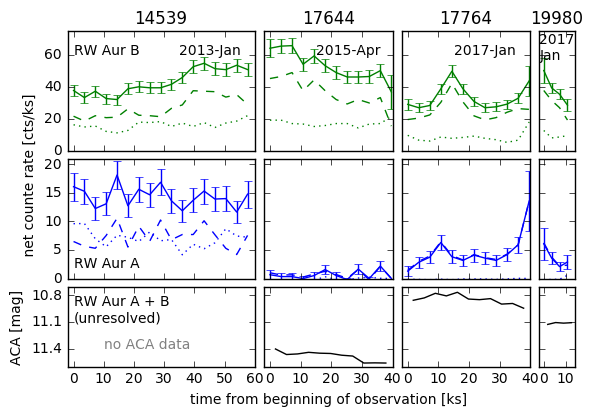

In [8]:
from matplotlib.ticker import MaxNLocator, MultipleLocator

fig = plt.figure()

width = np.array([lc[0]['t'][-1] for lc in lccurves])
width = width / width.sum() * 0.8  # last factor is scale factor to make space for label left of plot
ypos = [0.13, 0.35, 0.67]
dy = [0.2, 0.3, 0.3]
axes = []
for y in range(3):
    for x in range(4):
        kwargs = {}
        if y != 0:
            kwargs['sharex'] = axes[x]
        if x != 0:
            kwargs['sharey'] = axes[y * 4]
        axes.append(fig.add_axes((.1 + np.sum(width[0:x]) + x * 0.015, ypos[y], width[x], dy[y]), **kwargs))

for j in range(3):
    for i in [1, 2, 3]:
        plt.setp(axes[j * 4 + i].get_yticklabels(), visible=False)
        
for j in [1, 2]:
    for i in range(4):
        plt.setp(axes[j * 4 + i].get_xticklabels(), visible=False)
    
for i, obsid in enumerate(obsids):
    axes[1 * 4 + i].errorbar(lccurves[i][0]['t']/1e3, lccurves[i][0]['NET_RATE_all'] * 1e3, lccurves[i][0]['ERR_RATE_all'] * 1e3, 
                             label='0.3-9.0 keV', color='b')
    axes[1 * 4 + i].plot(lccurves[i][0]['t']/1e3, lccurves[i][0]['NET_RATE_soft'] * 1e3, 
                         color='b', ls=':', label='0.3-1.0 keV')
    axes[1 * 4 + i].plot(lccurves[i][0]['t']/1e3, lccurves[i][0]['NET_RATE_hard'] * 1e3, 
                         color='b', ls='--', label='1.0-9.0 keV')
    axes[2 * 4 + i].errorbar(lccurves[i][1]['t']/1e3, lccurves[i][1]['NET_RATE_all'] * 1e3, lccurves[i][1]['ERR_RATE_all'] * 1e3,
                             label='RW Aur B', color='g')
    axes[2 * 4 + i].plot(lccurves[i][1]['t']/1e3, lccurves[i][1]['NET_RATE_soft'] * 1e3, 
                         color='g', ls=':', label='_no_legend_')
    axes[2 * 4 + i].plot(lccurves[i][1]['t']/1e3, lccurves[i][1]['NET_RATE_hard'] * 1e3, 
                     color='g', ls='--', label='_no_legend_')
    axes[2 * 4 + i].set_title(obsid)
    if i > 0:
        axes[i].plot(lcaca[i-1]['time'] / 1e3, lcaca[i - 1]['mag'], color='k')
    
axes[8].yaxis.set_major_locator( MaxNLocator(nbins=4) )
axes[0].yaxis.set_major_locator( MaxNLocator(nbins=4) )
for i in [0, 1, 2, 3]:
    axes[i].xaxis.set_major_locator( MultipleLocator(10) )
    axes[i].set_xlim(-2, None)
axes[4].set_ylim(0, 0.021 * 1e3)
axes[8].set_ylim(0, 0.075 * 1e3)   
axes[0].invert_yaxis()
#axes[5].legend(fontsize=10, loc='upper left')
axes[4].set_ylabel('                    net counte rate [cts/ks]')
axes[1].set_xlabel('time from beginning of observation [ks]')
axes[0].set_ylabel('ACA [mag]')
axes[8].text(0., 60., 'RW Aur B')
axes[4].text(0, 2., 'RW Aur A')
axes[0].text(0, 11.1, 'RW Aur A + B\n(unresolved)')
axes[0].text(10, 11.4, 'no ACA data', color='0.5')
axes[8].text(35., 60, '2013-Jan')
axes[9].text(15, 60., '2015-Apr')
axes[10].text(15, 60., '2017-Jan')
axes[11].text(-2, 57., '2017\nJan')
fig.savefig(os.path.join(figout, 'lc.pdf'), bbox_inches='tight')

Figure~\ref{fig:lc} shows X-ray lightcurves for both components of the RW~Aur system and the ACA lightcurve where data exisist. RW~Aur~B shows X-ray activity in every observation, but the average fluxes are all similar. During the first observation, the flux increases smoothly by 30\% and decreases by a similar amount in the second observation. ObsID~17764 shows a short flare in the hard band that lasts about 5~ks and a rise in the soft band just before the end of the exposure. ObsID~19980 shows raid decline of the hard X-ray flux, possibly the tail end of a flare. Note that the count rate in the soft band is lower for the later observations, because contamination bilds up on ACIS and the effective area declines with time. This is properly taken into account when modelling the extracted spectra below. RW~Aur~A is fainter than RW~Aur~B in all observations thus the lightcurves are noisier. Significant variability within an observation is seen only towards the end of ObsID~17764 where the hard flux tripes with respect to the rest of that observation but there are large long-term changes. The count rate in 2015 is more than an order of magnitude below the value seen in 2013 before the dimmined started. In the 2017 observations, the hard count rate reached about the pre-dimming level again, but essentially no signal is picked up at all in the soft band. This loss of soft photons is much stronger then in RW~Aur~B and is intrinsic to the source and not just caused by ACIS contamination.

The ACA monitoring shows steady lightcurves with smooth variability on the 0.1~mag level during the observations.

In [70]:
# Check if last bin in 17764 is responsible for an unsusually large fraction for 6.6 keV photons
srca = Table.read(os.path.join(datadir, '17764_srca.fits'), hdu=1)

(6000, 7000)

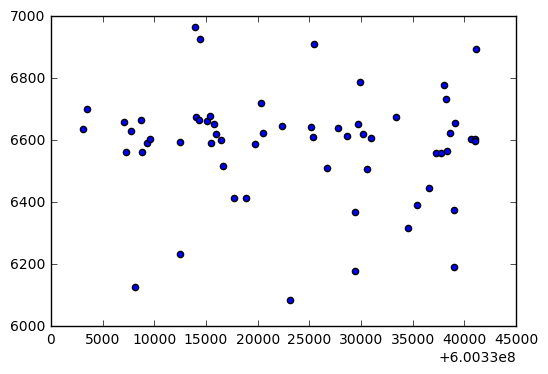

In [71]:
plt.scatter(srca['time'], srca['energy'])
plt.ylim(6000, 7000)

### Optical lightcurves

In [9]:
aavso = Table.read('aavsodata.txt', format='ascii', fill_values = ('N/A', 0))
# Sometimes the Magnitude column contains the "<" sing for upper limits.
aavso['Mag'] = np.zeros(len(aavso))
for i in range(len(aavso)):
    try:
        aavso['Mag'][i] = float(aavso['Magnitude'][i])
    except ValueError:
        aavso['Mag'][i] = np.ma.masked

In [10]:
bands = OrderedDict([('Vis.', {'color': (1., 0.5, 1.), 'marker': '.'}),
                     ('B', {'color': 'b', 'marker': 'p'}),
                     ('V', {'color': 'g', 'marker': 'o'}),
                     ('R', {'color': 'r', 'marker': '*'}),
                     ('ACA', {'color': 'k', 'marker': 'D', 'markersize': 7})
                    ])
def plotaavso(ax):
    for band in bands:
        ind = (aavso['Band'] == band)
        ax.plot(aavso['JD'][ind]-2400000.5, aavso['Mag'][ind], linestyle='None', **bands[band], label=band)

In [11]:
obstimes = [[Time(lc[0]['TIME_MIN'][0], format='cxcsec').mjd, 
             Time(lc[0]['TIME_MAX'][-1], format='cxcsec').mjd] for lc in lccurves]
# Add Chandra ACA magnitudes
aavso.add_row({'JD': Time(lccurves[1][0]['TIME'].mean(), format='cxcsec').jd, 'Mag': 11.5, 'Band': 'ACA'})
aavso.add_row({'JD': Time(lccurves[2][0]['TIME'].mean(), format='cxcsec').jd, 'Mag': 10.9, 'Band': 'ACA'})
aavso.add_row({'JD': Time(lccurves[3][0]['TIME'].mean(), format='cxcsec').jd, 'Mag': 11.1, 'Band': 'ACA'})

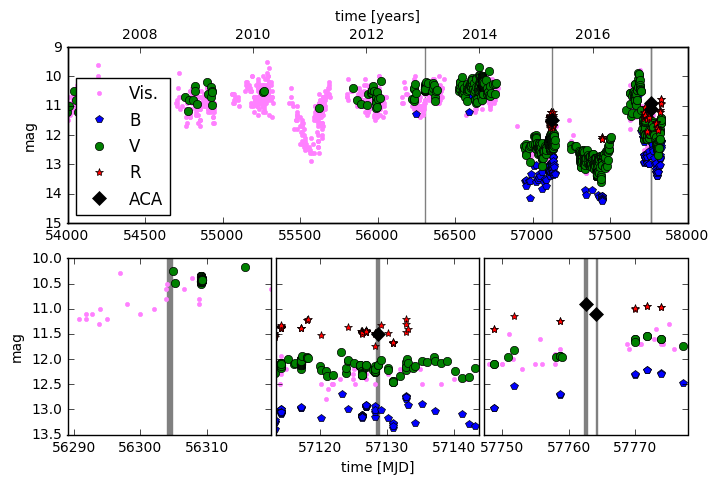

In [12]:
from matplotlib.ticker import MaxNLocator

fig = plt.figure(figsize=(8,5))
ax11 = fig.add_subplot(211)
ax21 = fig.add_subplot(234)
ax22 = fig.add_subplot(235, sharey=ax21)
ax23 = fig.add_subplot(236, sharey=ax21)

# Set up second x-axis for top plot that is labeled in years
ax11years = ax11.twiny()

def years(tmjd):
    return Time(tmjd, format='mjd').decimalyear

def update_ax11years(ax11):
   y1, y2 = ax11.get_xlim()
   ax11years.set_xlim(years(y1), years(y2))
   ax11.figure.canvas.draw()

# automatically update ylim of ax2 when ylim of ax1 changes.
ax11.callbacks.connect("xlim_changed", update_ax11years)

for ax in fig.axes:
    plotaavso(ax)
    
for ax in fig.axes:
    for i in range(4):
        ax.bar(obstimes[i][0], height=10, width=obstimes[i][1]-obstimes[i][0], bottom=8, align='edge', 
               color='0.5', edgecolor='0.5')
    
ax11.invert_yaxis()
ax11.set_xlim([54000, 58000])
dtime = 15.
for i, ax in enumerate([ax21, ax22, ax23]):
    ax.set_xlim(obstimes[i][0] - dtime, obstimes[i][1] + dtime)
    ax.get_xaxis().get_major_formatter().set_useOffset(False)
    ax.xaxis.set_major_locator( MaxNLocator(nbins=4, steps=[1, 5, 10]) )
plt.setp(ax22.get_yticklabels(), visible=False)
plt.setp(ax23.get_yticklabels(), visible=False)

fig.subplots_adjust(wspace=0.02)

ax11.legend(numpoints=1, loc='lower left')
ax11.set_ylabel('mag')
ax21.set_ylabel('mag')
ax22.set_xlabel('time [MJD]')
ax11years.set_xlabel('time [years]')

ax21.set_ylim([13.5, 10])
ax11.set_ylim([15, 9])
fig.savefig(os.path.join(figout, 'opticallc.pdf'), bbox_inches='tight')

Figure~\ref{fig:opticallc} shows a long-term lightcurve of the RW~Aur system. The first \emph{Chandra} observation took place a bright state which had been the long-term average for many years with $m_V=10.5$~mag. The second \emph{Chandra} dataset was taken in an obscured state with $m_V=12$~mag in 2015. At the end of 2016, RW~Aur briefly reached a bright state again, before fading back to $m_V=11.7$ during the \emph{Chandra} observations in 2017. Unfortunately, there is gap in the optical data of a few days right around the \emph{Chandra} observation. However, while RW~Aur is known to have some variation on time scales of days and hours \citep{2016MNRAS.463.4459B}, the lightcurve around the 2017 observations seems relatively smooth and the ACA lightcurves do not indicate significant variability within an observation either (Figure~\ref{fig:lc}), so we interpolate the optical lightcurves to obtain values during te \emph{Chandra} observation (table~\ref{tab:BVR}). In 2015, there are observations within a few hours of the \emph{Chandra} data in all bands. In all cases, the uncertainty is dominated by the variability of the target and we estimate the error on the optical magnitudes to 0.2~mag. Within this uncertainty, RW~Aur is brigher by 0.5~mag in $B$, $V$, $R$, and the ACA band during the 2017 \emph{Chandra} observation, compared with 2015. We do not see significant changes in the optical color between those observations.

None of the optical data presented here resolves the RW~Aur system. However, RW~Aur~B is not known to be significantly variable \citep[see discussion and references in][]{2015A&A...584L...9S}, so we can subtract the long-term average of the RW~Aur~B fluxes (table~\ref{tab:BVR}) to obtain the brightness of RW~Aur~A. Within the uncertainties, we do not see changes in color. On the other hand, changes in $B-V$ color up to about 0.3~mag are also possible.

In [185]:
# output->LaTeX

def mA(mAB, mB):
    return -2.5 * np.log10(10**(-mAB/2.5) - 10**(-mB/2.5))

def sigma_mA(mAB, mB, sig_AB, sig_B):
    nominator = sig_AB**2*10.**(-0.8*mAB) + sig_B**2 * 10.**(-0.8*mB)
    demoninator = 10.**(-mAB/2.5) - 10.**(-mB/2.5)
    return np.sqrt(nominator) / demoninator

tab = Table()
tab['band'] = ['B', 'V', 'R']
tab['$m_B$'] = np.array([14.5, 13.2, 12.3])
tab['$\sigma_B$'] = 0.3
tab['$m_{AB}$ 2015'] = np.array([13., 12.2,11.5])
tab['$m_{AB}$ 2017'] = np.array([12.5,11.7, 11.2])
tab['$\sigma_{AB}$'] = 0.2
tab['$m_{B}$ 2015'] = mA(tab['$m_{AB}$ 2015'], tab['$m_B$'])
tab['$\sigma_B$ 2015'] = sigma_mA(tab['$m_{AB}$ 2015'], tab['$m_B$'], tab['$\sigma_{AB}$'], tab['$\sigma_B$'])
tab['$m_{B}$ 2017'] = mA(tab['$m_{AB}$ 2017'], tab['$m_B$'])
tab['$\sigma_B$ 2017'] = sigma_mA(tab['$m_{AB}$ 2017'], tab['$m_B$'], tab['$\sigma_{AB}$'], tab['$\sigma_B$'])
for col in tab.columns:
    if col != 'band':
        tab[col].format = '{:3.1f}'
        
latexdict = copy.deepcopy(latex.latexdicts['AA'])
latexdict['tabletype'] = 'table*'
latexdict['caption'] = '\\label{tab:BVR} Optical flux (in mag) for RW~Aur.'
   
tab.write(sys.stdout, format='ascii.latex', latexdict=latexdict)

\begin{table*}
\caption{\label{tab:BVR} Optical flux (in mag) for RW~Aur.}
\begin{tabular}{cccccccccc}
\hline \hline
band & $m_B$ & $\sigma_B$ & $m_{AB}$ 2015 & $m_{AB}$ 2017 & $\sigma_{AB}$ & $m_{B}$ 2015 & $\sigma_B$ 2015 & $m_{B}$ 2017 & $\sigma_B$ 2017 \\
\hline
B & 14.5 & 0.3 & 13.0 & 12.5 & 0.2 & 13.3 & 0.3 & 12.7 & 0.2 \\
V & 13.2 & 0.3 & 12.2 & 11.7 & 0.2 & 12.8 & 0.4 & 12.0 & 0.3 \\
R & 12.3 & 0.3 & 11.5 & 11.2 & 0.2 & 12.2 & 0.5 & 11.7 & 0.4 \\
\hline
\end{tabular}
\end{table*}


### X-ray spectra
For consistency with previous work, we use the abundance table from \citet{1998SSRv...85..161G} as baseline throughout this paper. Uncertainties in this section are given as 90\% confidence ranges.

First, we concentrate on the new data taken in 2017. Both datasets are fitted to the same model using their respective effective area and spectral response files using ungrouped data and the Cash \textbf{reference here} statistic. We restric the fit to the spectral region between 3 and 9~keV, where the background is nigligible (see below).

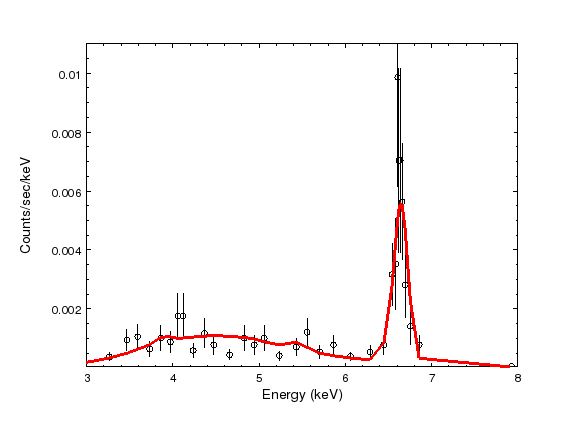

In [153]:
IPython.display.Image(filename=os.path.join(figout, 'spec_17.png'))

In [162]:
import json
def display_json_fit_results(filename):
    with open(os.path.join(figout, filename)) as f:
        fit = json.load(f)
    for c in ['val', 'up', 'down']:
        for i in range(len(fit[c])):
            if fit[c][i] is None:
                fit[c][i] = np.nan

    normem = 4 * np.pi * u.pc.to(u.cm)**2 * 140**2 * 1e14 * 1e-52
    for i in range(len(fit['name'])):
        if ('norm' not in fit['name'][i]):
            print('{0}: {1:6.4f} + {2:6.4f} {3:6.4f}'.format(fit['name'][i],
                                                                                        fit['val'][i],
                                                                                        fit['up'][i],
                                                                                        fit['down'][i]))
    for i in range(len(fit['name'])):
        if 'norm' in fit['name'][i]:
            print('{0} turned into EM in units of 1e52: {1:3.1f} + {2:3.1f} {3:3.1f}'.format(fit['name'][i],
                                                                                        fit['val'][i] * normem,
                                                                                        fit['up'][i] * normem,
                                                                                        fit['down'][i] * normem))

In [163]:
display_json_fit_results('spec_fe.json')

a1.nH: 38.2038 + 6.7764 -9.3050
v1.kT: 1.1546 + 0.8982 -0.1544
v1.Fe: 10.0902 +    nan -7.6329
v1.norm turned into EM in units of 1e52: 151.0 + 140.4 -131.4


We fit a single optically thin, thermal emission APEC model \citep{2012ApJ...756..128F} and a cold photoelectric absorber. Figure~\ref{fig:17} shows the data and the best-fit model. A key feature is the emission around 6.6~keV. This region is dominated by a complex of unresolved iron emission lines in the ionization stages Fe~{\sc xxii} to Fe~{\sc xxv}. The He-like triplet of Fe~{\sc xxv} dominates the emission if enough hot plasma (peak formation temperature for the lines is 5.5~keV) is present; those lines have energies around 6.7~keV. The lower ionization stages have weaker lines, many of which are located at slightly lower temperatures. The peak of the emission feature seen in RW~Aur~A is around 6.62~keV, indicating that the temperature is too low to form Fe~{\sc xxv}. This is is confirmed by the model fit with temperatures of 1.2~(1.0-2.0)~keV. The emissivity of iron drops by several orders of magnitude over a small range of temperatures. So, for lower temperatures at he lower end of the confidence interval, iron abundances several orders of magnitude above solar would be required. The fitted value is 10~(2.4-$>1000$). This plama model predicts emission at lower energies, too, and an absorbing column density of 38~(29-45)~$\times10^{22}$~cm$^{-2}$ is required to fit the observations. The emission measure of the plamsa model is 150~(20-290)~$\times10^{52}$~cm$^{-3}$. Again, the value of this parameters is highly correlated with the other fit paramters where a hotter and less absorbed plama requires significantly less emission meassure to produce the observed flux than an cooler and more absorbed plasma.

We now proceed to compare the X-ray spectra taken in 2017 with the previous existing data (figure~\ref{fig:spec}) using the full . Gray datapoints in the figure show the spectra extracted from the broken annulus which serves as our background region for all four observations. The shape and flux of these spectra is so similar that they all fall on essentially the same curve except at low energies where the decline in the ACIS effective area can be seen. We thus use the same background model for all observations. (The new observations were taken in full-frame mode, and RW~Aur~B shows significant pile-up when looking at the spectra extracted from the core of its PSF. Thus, we present the data from the annulus here instead.) 
On the other hand, there are dramatic differences in the spectrum of RW~Aur~A. In 2017, RW~Aur~A is significantly brighter at high energies than ever before and it shows a strong emission feature around 6.6~keV that has not been seen previously. At the same time, there is very little signal at soft energies and these few counts are most likely due to the PSF or RW~Aur~B as shown in the spectral modelling below. This must be due to an absorbing column density that is much larger than either in the bright state in 2013 or in the previous faint state in 2015.

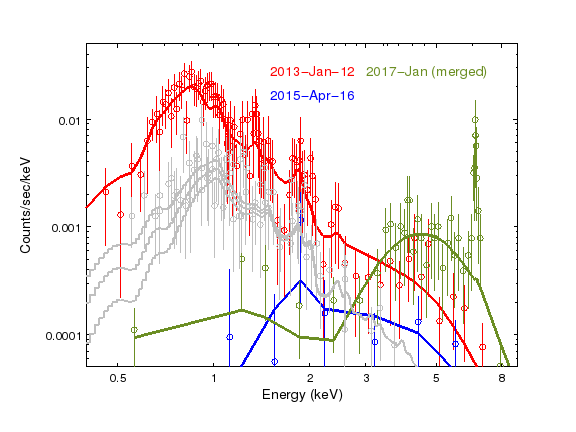

In [154]:
IPython.display.Image(filename=os.path.join(figout, 'spec.png'))

We now fit spectral models to the data. Fits are done for source and background model, using data grouped to five counts per bin using the \texttt{chi2gehrels} statistic in sherpa \citep{2007ASPC..376..543D}.
The background of RW~Aur~A is due to the wings of the PSF from the brighter RW~Aur~B. Thus, we descibe the background with the same model used for RW~Aur~B in \citet{2014ApJ...788..101S}, which consists of two optically thin, thermal emission components in an APEC model and a cold photoelectric absorber. We fix absorbing column density, temperatures and abundances and only it the emission measure of is left free to account for the fact that our background region encompasses only a small fraction of the PSF. We use the exact same parameters for the background in all four observations since the lightcurves show that the avarage flux is comparable in all cases.

The spectra of RW~Aur~A are then fitted with a model that has two components: The background model derived from RW~Aur~B (scaled for the differenent areas of source and background extraction region) and the source model for RW~Aur~A. The advantage of this approach is that the uncertainty in the count rate for every bin follows Poisson statistics.

First, we compare our new data to previous work and set the elemental abudances to be Ne enhanced by a factor of 1.4 and Fe depleted to 0.4 as fitted in \citet{2014ApJ...788..101S}. We constrain the spectral model as in \citet{2015A&A...584L...9S}, i.e.\ we use two optically thin, thermal emission APEC models where we fix the ratio of the emission meassure of the hot to the cool component to 1.3, and we fix the temperature of the cool component to 0.63~keV. The temperature of the hot component is fixed to 20~keV in this model and the temperature of the cool component is set to be the same for all four observations. 

In [157]:
display_json_fit_results('spec_fit.json')

a1.nH in units of 1e22: 0.0248 + 0.0368    nan
a2.nH in units of 1e22: 2.5660 + 44.1373 -2.0056
a3.nH in units of 1e22: 17.9816 + 8.5497 -5.5821
v11.norm turned into EM in units of 1e52: 0.7 + 0.1 -0.1
v21.norm turned into EM in units of 1e52: 0.3 + 2.3 -0.2
v31.norm turned into EM in units of 1e52: 5.3 + 2.8 -1.9


This model has six parameters: Absorbing column density and emission meassure for 2013, 2015, and 2017. The absorbing column density gives (0.02~(0-0.05), 2.6~(0.5-46), and 18~(12-26) in units of $10^{22}$~cm$^{-2}$, 
respectively for 2013, 2015, and 2017 and emission measure of the cool component for the data from 2013, 2015, and 2017 is 0.7~(0.6-0.8), 0.3~(0.1-2.6), and 5~(3-8) in units of $10^{52}$~cm$^{-3}$.
The fitted model is shown in figure~\ref{fig:spec}. They describe the data very well except in the region around 6.6~keV in the two observations taken in 2017. Evaluating that source and (scaled) background component of the model separately shows that all photons below about 3~keV that were observed in 2017 are due to the background, i.e.\ are contamination from RW~Aur~B.

This model is build to match the observations from 2013. In 2015 there is really too little data to assess the temperature structure of the plasma without strong assumptions and in 2017 the absorption is so large that emission from a cool component is entirely absorbed; thus we cannot determine if a cool component is really present and if so, what its temperature, emission meassure and abundance is. Still, the large absorption is robust, because the spectrum clearly shows a hot component which also produces soft emission. The fact that even this emission is not seen places strong constraints on the fit. The fitted model does not show any any feature at the position of the strong Fe emission around 6.6~keV, clearly prooving that this feature cannot be produced by plasma with the same abundances as observed in 2013. The fitted value for $N_\mathrm{H}$ is very large for a stellar spectrum and almost compatible with the value obtained in the fit in the last section. The difference represents a systemtic ambiguity, where additional emission at lower energies (the low-energy tail of the hot plasma or from an additional plasma component) is compensated by an higher absorption. Our fit in the last section has a lower temperature than the hot plasma component from \citet{2014ApJ...788..101S} which was fixed arbitrarily at 20~keV; thus there is stronger low-energy emission in our previous fit and a larger absorbing column density is required to reduce the intrisic low-energy flux to mathc the observation.

## Discussion

The optical proerties of RW~Aur~A in the new dimming event that started at the end of 2016 are similar to the previous dimming observed from 2014-2016. The $B-V$ and $V-R$ color is similar, and the depth of the dimming is 0.5~mag less than before. In fact, from optical observations alone, it is not clear if the new dimming is an unrelated event or just a conitnuation of the dimming that started in 2014 with just a short interruption in the abrobing material in between. On the other hand, in X-rays the properties of RW~Aur~A are dramamtically different. There is virtually no signal 2~keV thanks to an absorbing column density around $4\times10^{23}$~cm$^{-2}$, which is about one order of magnitude more than seen in 2015 and two orders of magnitude more than seen in the pre-dimming observation in 2013. At the same time the flux at high energies has increased by a factor of a few compared to pre-dimming values. In 2013 the hard X-ray flux was even lower than in 2015, albeit with large uncertainties due to the low signal.
Lastly, a complex of emission lines around 6.6~keV has appeared pointing to an Fe abundance increased by an order of magntitude compared to pre-dimming values. (The signal in 2015 was too low to fit the abundance). 

The most obvious explanation for addtional flux at high energies in an active star is typically a large coronal flare. However, the lightcurves during the new observations in 2017 are almost flat and neither does this explain the Fe abundance or the $N_\mathrm{H}$.



\acknowledgments
The scientific results reported in this article are based on observations made by the Chandra X-ray Observatory. We acknowledge with thanks the variable star observations from the AAVSO International Database contributed by observers worldwide and in particular the BAAVSS and used in this research. This research has made use of software provided by the Chandra X-ray Center (CXC) in the application packages CIAO, ChIPS, and Sherpa. Support for this work was provided by the National Aeronautics and Space Administration through Chandra Award Numbers DD5-16077X and GO6-17021X issued by the Chandra X-ray Observatory Center, which is operated by the Smithsonian Astrophysical Observatory for and on behalf of the National Aeronautics Space Administration under contract NAS8-03060.

\vspace{5mm}
\facilities{CXO(ACIS,ACA), AAVSO}

%% Similar to \facility{}, there is the optional \software command to allow 
%% authors a place to specify which programs were used during the creation of 
%% the manusscript. Authors should list each code and include either a
%% citation or url to the code inside ()s when available.

\software{astropy \citep{2013A&A...558A..33A},
          CIAO \citep{2006SPIE.6270E..60F},
          Sherpa \citep{2007ASPC..376..543D}
          }

\bibliographystyle{../AAStex/v611/aasjournal}
\bibliography{../articles}

\end{document}

Invite 	Dubois, Franky as co-author, because responsible for 153 pointso nlightcurve, incl the recent crucial B and R (http://www.digilife.be/club/franky.dubois/ or chanatc through AAVSO office)